In [129]:
import matplotlib.pyplot as plt
import numpy as np
from mylib import *
from skimage.segmentation import mark_boundaries, slic
%matplotlib notebook

In [130]:
secao = np.load('secao_do_plug.npy')

<IPython.core.display.Javascript object>


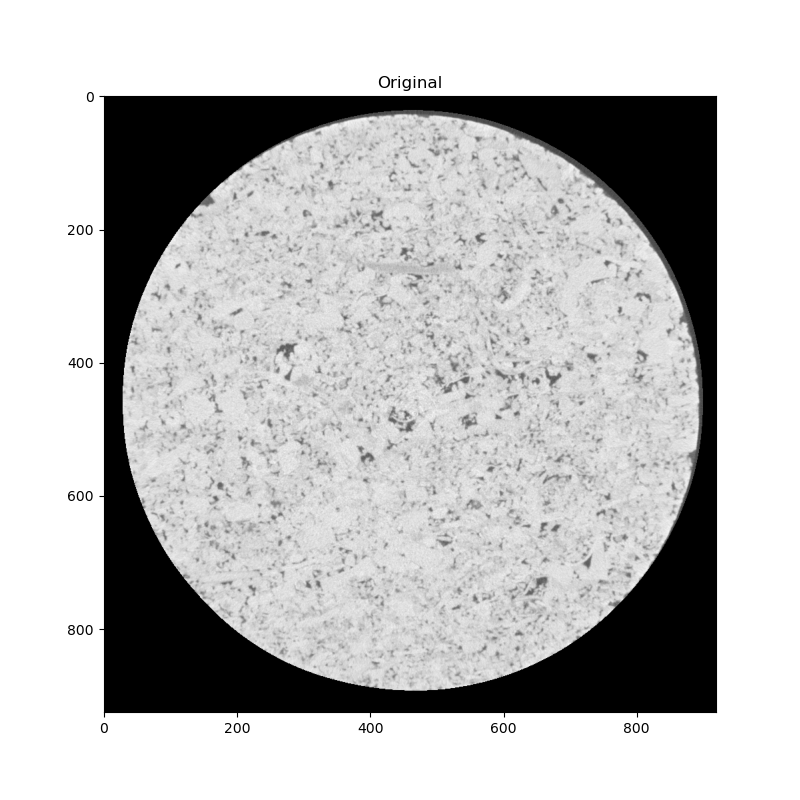

In [131]:
show_gray(secao, "Original")

In [132]:
print("shape da secao original ->", secao.shape)

shape da secao original -> (925, 920)


In [133]:
secao_reduzida = secao[::2,::2]

<IPython.core.display.Javascript object>


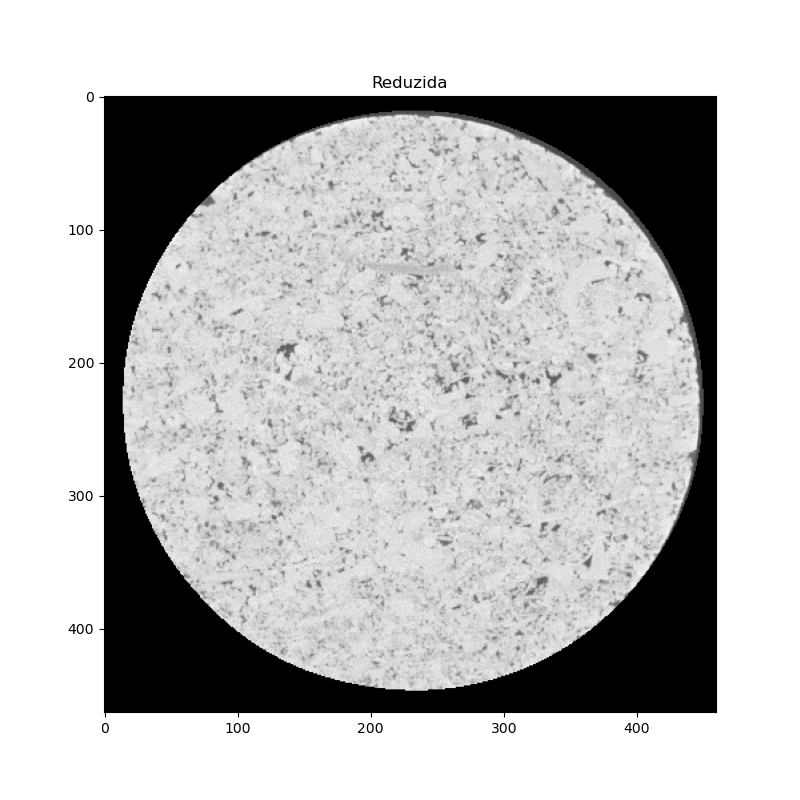

In [134]:
show_gray(secao_reduzida, "Reduzida")

In [135]:
print("shape da secao reduzida ->", secao2.shape)

shape da secao reduzida -> (463, 460)


In [136]:
mascara = secao_reduzida > 0

<IPython.core.display.Javascript object>


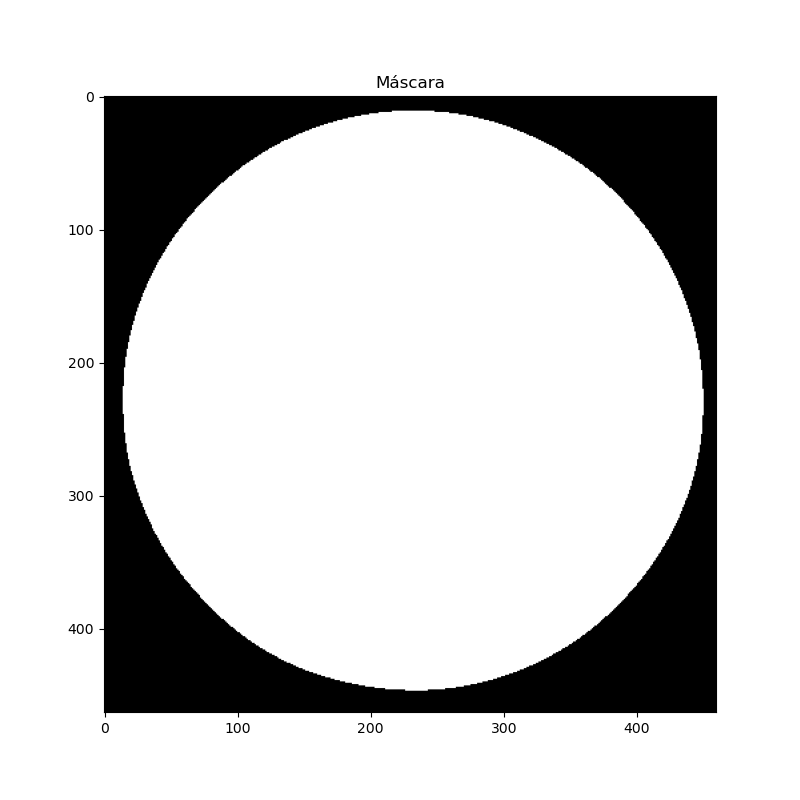

In [137]:
show_gray(mascara, "Máscara")

<IPython.core.display.Javascript object>


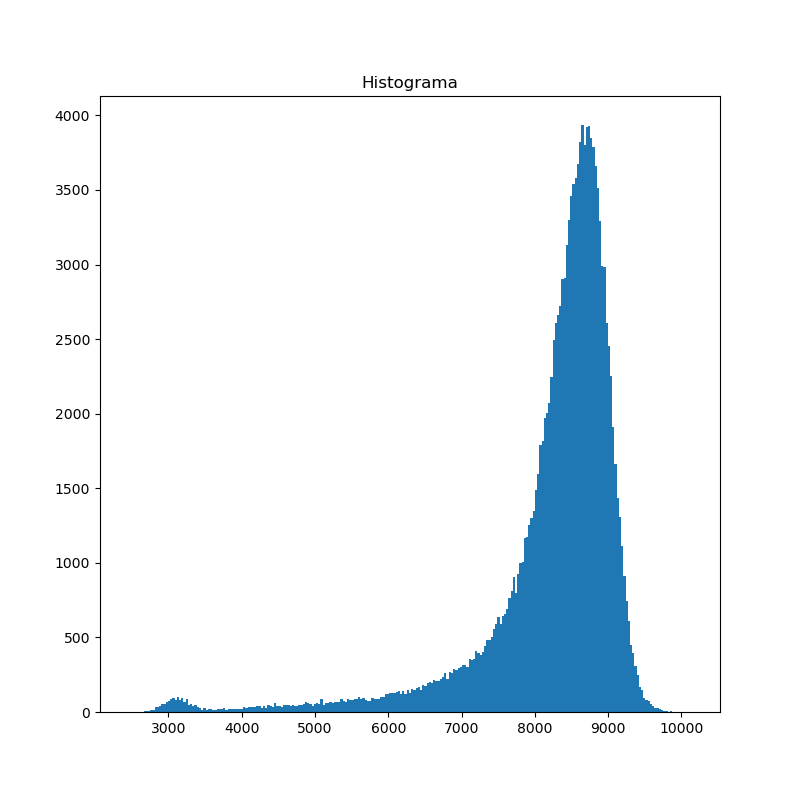

In [138]:
show_hist(secao_reduzida[mascara].ravel(), "Histograma")

<IPython.core.display.Javascript object>


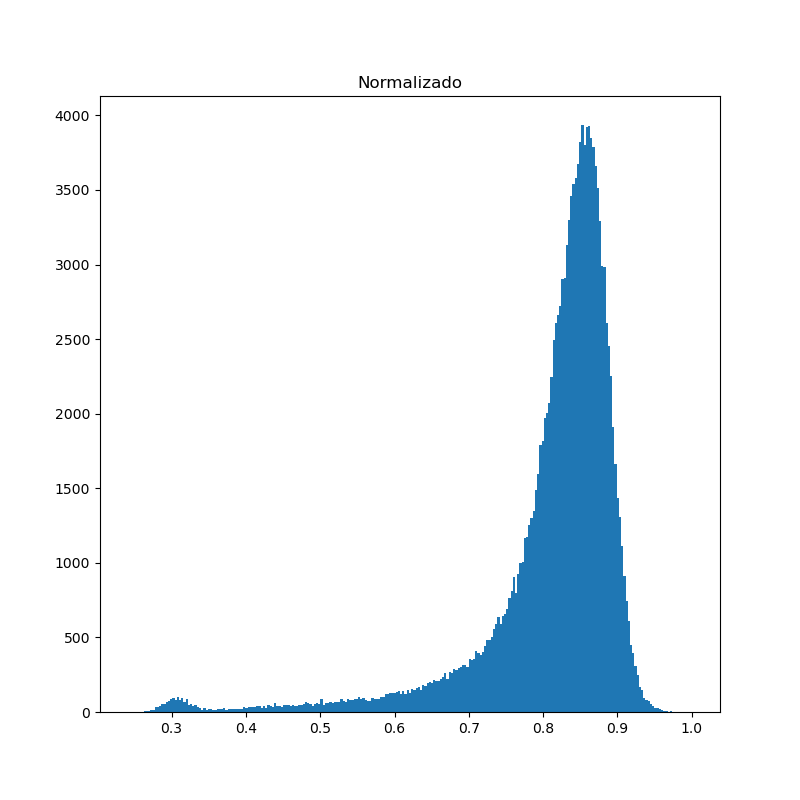

In [139]:
secao_normalizada = secao_reduzida.astype(float)
vmax = np.amax(secao_normalizada)
vmin = np.amin(secao_normalizada)
secao_normalizada = (secao_normalizada - vmin)/(vmax - vmin)
show_hist(secao_normalizada[mascara].ravel(), "Normalizado")

In [140]:
segmentos_1 = slic(secao_normalizada, n_segments=3000, compactness=0.06, max_iter=50, slic_zero=False, mask=mascara)

In [141]:
img_sp_1 = mark_boundaries(secao_normalizada, segmentos_1, (1,0,0))

<IPython.core.display.Javascript object>


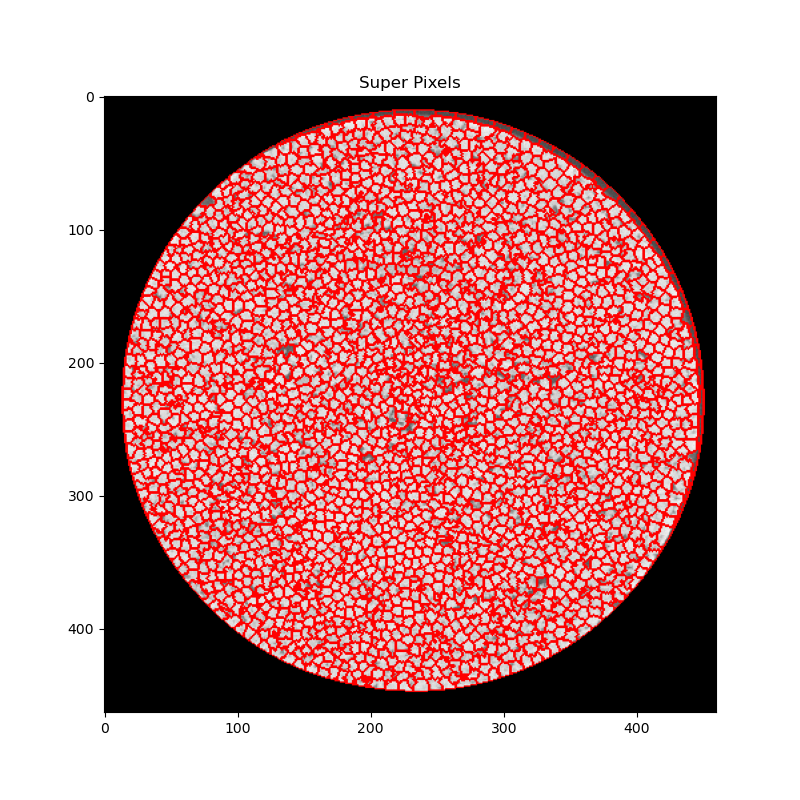

In [142]:
show_rgb(img_sp_1, "Super Pixels")

In [143]:
img_sp_2 = mark_boundaries(secao_normalizada, segmentos_1, (1,0,0), mode='subpixel')

<IPython.core.display.Javascript object>


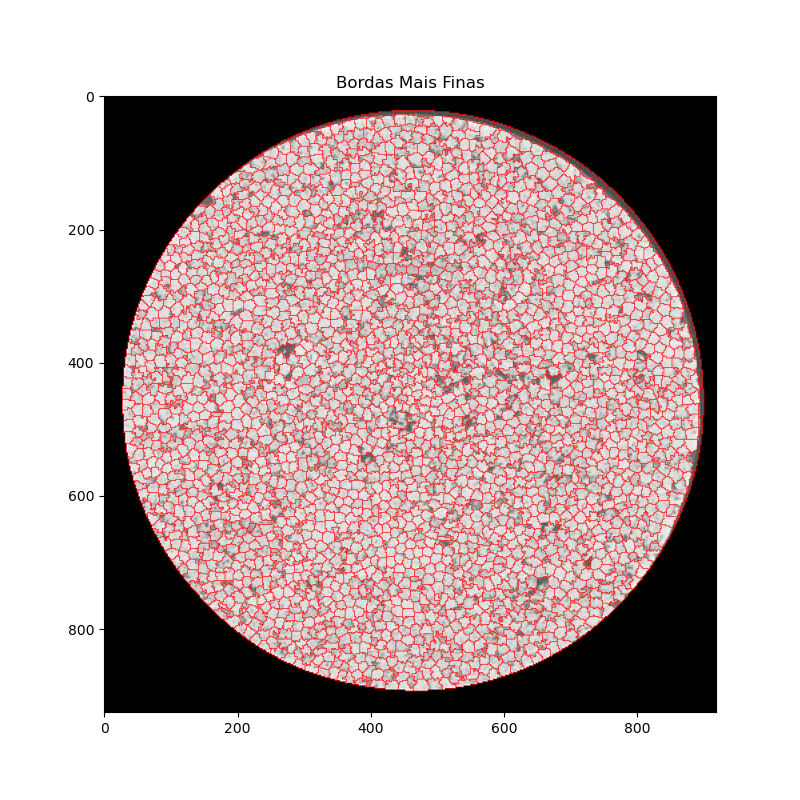

In [144]:
show_rgb(np.clip(img_sp_2, a_min=0, a_max=1), "Bordas Mais Finas")

In [145]:
# mais segmentos e mais iterações
segmentos_2 = slic(secao_normalizada, n_segments=8000, compactness=0.04, max_iter=500, slic_zero=False, mask=mascara)

In [146]:
# usa o modo subpixel para gerar as bordas
# acrescenta pixels extras na imagem para representar as bordas
img_superpixels_thinerboundaries = mark_boundaries(secao_normalizada, segmentos_2, (1,0,0), mode='subpixel')

<IPython.core.display.Javascript object>


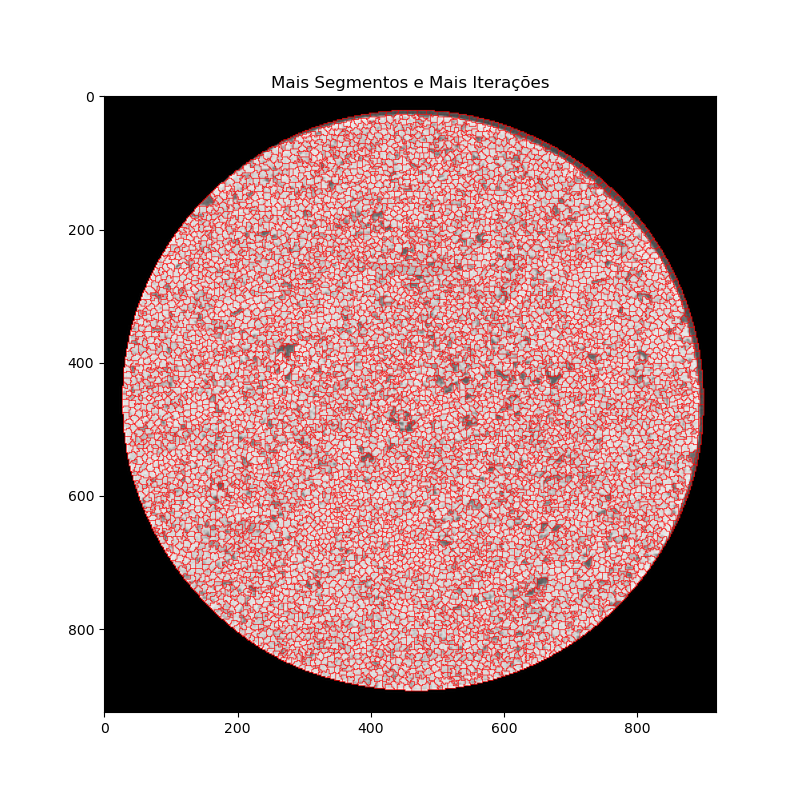

In [147]:
show_rgb(np.clip(img_superpixels_thinerboundaries, a_min=0, a_max=1), "Mais Segmentos e Mais Iterações")

<IPython.core.display.Javascript object>


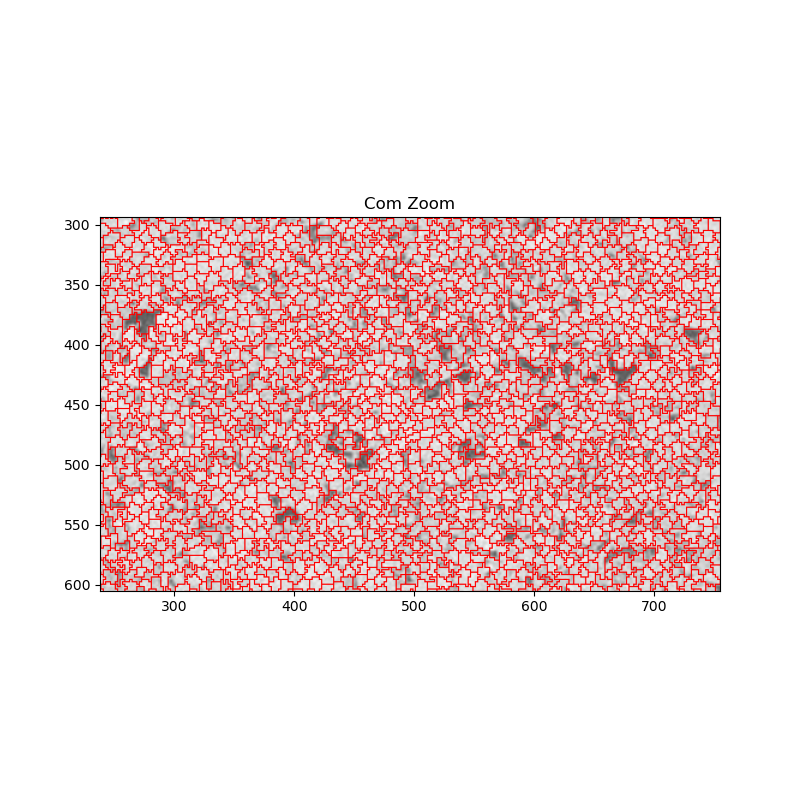

In [148]:
show_rgb(np.clip(img_superpixels_thinerboundaries, a_min=0, a_max=1), "Com Zoom")